## Calculating PDF and CDF

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.rename(columns={'PetalLengthCm': 'PL', 'PetalWidthCm': 'PW', 'SepalLengthCm': 'SL', 'SepalWidthCm': 'SW'}, inplace=True)
df.head()

,Id,SL,SW,PL,PW,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_setosa = df[df['Species'] == 'Iris-setosa']
iris_versicolor = df[df['Species'] == 'Iris-versicolor']
iris_virginica = df[df['Species'] == 'Iris-virginica']

- PDF's are basically smoothened Histograms
- CDF's are cumulative Sums of these Histograms

- PDF >>> Integrate >>> CDF >>> Differnetiate >>> PDF

We can get numeric values of these using the histogram() method from numpy

In [5]:
counts, bin_edges = np.histogram(iris_setosa['PL'], bins = 10)
# store the returned edges in two numpy arrays
print(counts)
print(bin_edges)

[ 1  1  2  7 12 14  7  4  0  2]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


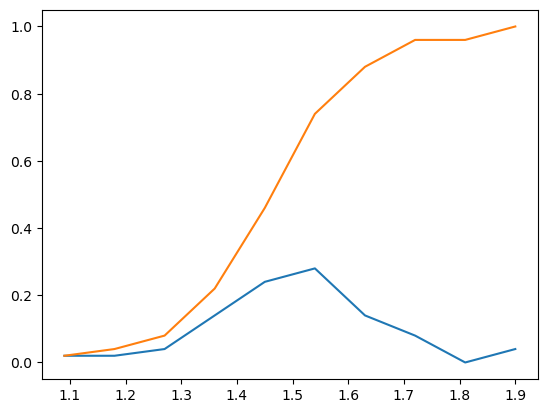

In [7]:
#calculating PDF and CDF is simple
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

# plotting them using the bin edges as x-axis
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
# we do [1:] because the length of binedges = 1 + length of counts

### Using CDF and PDF

Using PDF and CDF can give you better insights at the Data than other forms of Graphs. 

For example:- Using PDF we can write a better LOGIC for differntiating between the iris flowers.

Text(0, 0.5, 'Probability')

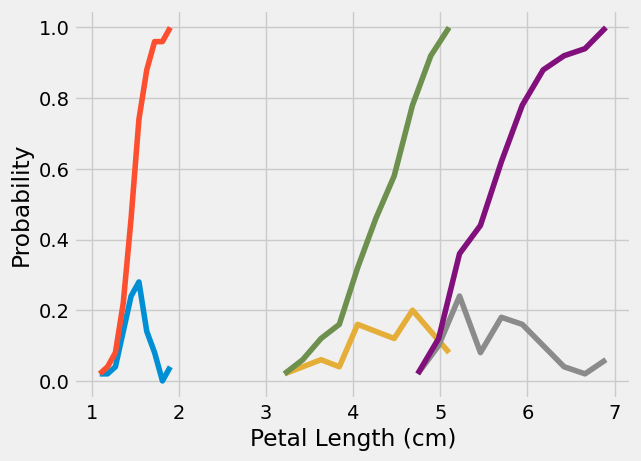

In [12]:
# plot the PDF and CDF for all the spicies
plt.style.use('fivethirtyeight')

# for setosa
counts, bin_edges = np.histogram(iris_setosa['PL'], bins=10)
pdf = counts/ sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

# for versicolor
counts, bin_edges = np.histogram(iris_versicolor['PL'], bins=10)
pdf = counts/ sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

# for virginica
counts, bin_edges = np.histogram(iris_virginica['PL'], bins=10)
pdf = counts/ sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

plt.xlabel('Petal Length (cm)')
plt.ylabel('Probability')

Consider the Graph above,

- We can definitely infer than setosa will lie below 2cm
- if we classify everything below 5cm as versicolor then we are correct 95%(appx) of the time
- if we classify everything below 5cm as virginica there is 10%(appx) chance that it is virginica, the rest of them are above 5cm